In [382]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

'''
TODO: 

1) Change survival rate to percentage 
2) Add error range for lines
3) Show error range for bar

'''

'\nTODO: \n\n1) Change survival rate to percentage \n2) Add error range for lines\n3) Show error range for bar\n\n'

## Prepare Data

In [383]:
df_clinical_trial = pd.read_csv(
    os.path.join('raw_data', 'clinicaltrial_data.csv')
)

df_mouse_drug = pd.read_csv(
    os.path.join('raw_data', 'mouse_drug_data.csv')
)
df_combo = df_clinical_trial.merge(
    df_mouse_drug,
    on='Mouse ID',
    how='outer'
)

DRUGS = ['Capomulin', 'Ketapril', 'Infubinol', 'Placebo']
df_combo.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumer Volume Over Time

In [402]:
df_tumor_vol = df_combo.pivot_table(
    values='Tumor Volume (mm3)',
    index='Timepoint',
    columns='Drug'
)[DRUGS]

df_tumor_vol.head()

Drug,Capomulin,Ketapril,Infubinol,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.389175,47.062001,47.125589
10,43.084291,49.582269,49.403909,49.423329
15,42.064317,52.399974,51.296397,51.359742
20,40.716325,54.920935,53.197691,54.364417


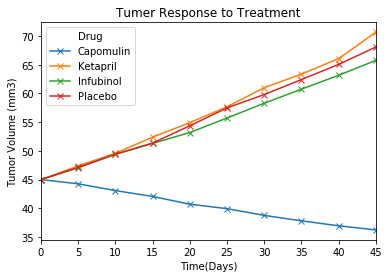

In [403]:
 df_tumor_vol.plot.line(
    marker='x',
    title='Tumer Response to Treatment',
)   
plt.xlabel('Time(Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Cancer Spreading Over Time

In [404]:
df_metastatic= df_combo.pivot_table(
    values='Metastatic Sites',
    index='Timepoint',
    columns='Drug'
)[DRUGS]

df_metastatic.head()

Drug,Capomulin,Ketapril,Infubinol,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.304348,0.280000,0.375000
10,0.320000,0.590909,0.666667,0.833333
15,0.375000,0.842105,0.904762,1.250000
20,0.652174,1.210526,1.050000,1.526316


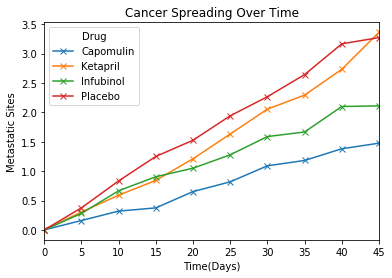

In [405]:
df_metastatic.plot.line(
    marker='x',
    title='Cancer Spreading Over Time'
)
    
plt.xlabel('Time(Days)')
plt.ylabel('Metastatic Sites')
plt.show()

## Survival Rates

In [406]:
df_mouse_count = df_combo.pivot_table(
    values='Mouse ID',
    index='Timepoint',
    columns='Drug',
    aggfunc='count'
)[DRUGS]

df_mouse_count.head()

Drug,Capomulin,Ketapril,Infubinol,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,23,25,24
10,25,22,21,24
15,24,19,21,20
20,23,19,20,19


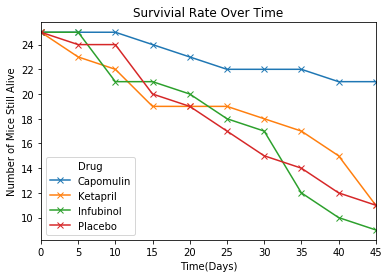

In [387]:
.reset_index().plot.line(
    x='Timepoint',
    y=DRUGS,
    marker='x',
    title='Survivial Rate Over Time'
)
    
plt.xlabel('Time(Days)')
plt.ylabel('Number of Mice Still Alive')
plt.show()

## Summary Bar Graph

In [416]:
df_summary = df_combo.pivot_table(
    values='Tumor Volume (mm3)',
    index='Timepoint',
    columns='Drug'
).agg(
    [lambda x: 100 * (x.iloc[-1] - x.iloc[0]) / x.iloc[0]]
)[DRUGS]

df_summary.melt()

,variable,value
0,Capomulin,-19.475303
1,Ketapril,57.028795
2,Infubinol,46.123472
3,Placebo,51.297960


In [433]:
df_summary = df_combo.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
df_summary.loc['Capomulin']

Timepoint
0     45.000000
5     44.266086
10    43.084291
15    42.064317
20    40.716325
25    39.939528
30    38.769339
35    37.816839
40    36.958001
45    36.236114
Name: Tumor Volume (mm3), dtype: float64

In [417]:
""".plot.bar(
   x='Drug',
   y='Tumor Volume Change',
   figsize=(10,6)
)
plt.xlabel('Drug')
plt.show()
"""
#df
df_summary.melt().set_index('variable').plot.bar(
    align='edge',
    width=0.9,
    edgecolor='r',
    linewidth=2,
    alpha=0.5,
    title='Tumor Change Over 45 Day Treatment',
    tick_label='abc',
    label=None,   
)
plt.xlabel('Drug')
plt.ylabel('% Tumer Volume Change')
plt.ylim((df.value.min(),100))
plt.xticks(np.arange(0.4, len(DRUGS)), rotation=0)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'value'

In [390]:
np.arange(0.5, len(DRUGS))

array([ 0.5,  1.5,  2.5,  3.5])